In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("df_analyse.csv")

In [8]:
df

,Unnamed: 0,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
0,0,451120,4,1.0,0,0,0,0,0
1,1,722410,2,1.0,0,0,0,0,0
2,2,621210,7,0.0,0,0,0,0,0
3,3,0,2,0.0,0,0,0,0,0
4,4,0,14,0.0,7,7,0,0,0
...,...,...,...,...,...,...,...,...,...
897989,897989,451120,6,0.0,0,0,0,0,0
897990,897990,451130,6,0.0,0,0,0,0,0
897991,897991,332321,26,0.0,0,0,0,0,0
897992,897992,0,6,0.0,0,0,0,0,1


In [9]:
df.columns

Index(['Unnamed: 0', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'MIS_Status'],
      dtype='object')

In [10]:
df = df[['NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob','FranchiseCode', 'UrbanRural', 'MIS_Status']]

In [11]:
df

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
0,451120,4,1.0,0,0,0,0,0
1,722410,2,1.0,0,0,0,0,0
2,621210,7,0.0,0,0,0,0,0
3,0,2,0.0,0,0,0,0,0
4,0,14,0.0,7,7,0,0,0
...,...,...,...,...,...,...,...,...
897989,451120,6,0.0,0,0,0,0,0
897990,451130,6,0.0,0,0,0,0,0
897991,332321,26,0.0,0,0,0,0,0
897992,0,6,0.0,0,0,0,0,1


In [12]:
df

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
0,451120,4,1.0,0,0,0,0,0
1,722410,2,1.0,0,0,0,0,0
2,621210,7,0.0,0,0,0,0,0
3,0,2,0.0,0,0,0,0,0
4,0,14,0.0,7,7,0,0,0
...,...,...,...,...,...,...,...,...
897989,451120,6,0.0,0,0,0,0,0
897990,451130,6,0.0,0,0,0,0,0
897991,332321,26,0.0,0,0,0,0,0
897992,0,6,0.0,0,0,0,0,1


D'apres le début de modélisation , nous avons vu que les colonne 'NAICS', 'RetainedJob', 'MIS_Status', 'NoEmp', 'Term', 'UrbanRural'
semble être les plus intéressante a la modelisation 

In [ ]:
# Nous allons donc organiser l'analyse de ces variables afin de comprendre les prédictions de notre modèle 


In [13]:
# noEMP est le nombre d'employé

In [14]:
# NAICS est la zone d'activité

In [15]:
# Term est la durée en moi du contrat 

In [16]:
# UrbanRural savoir si la société est dans une zone urbaine ou rural 

In [17]:
import seaborn as sns 

In [18]:
df["MIS_Status"]

0         0
1         0
2         0
3         0
4         0
         ..
897989    0
897990    0
897991    0
897992    1
897993    0
Name: MIS_Status, Length: 897994, dtype: int64

<AxesSubplot: xlabel='UrbanRural', ylabel='MIS_Status'>

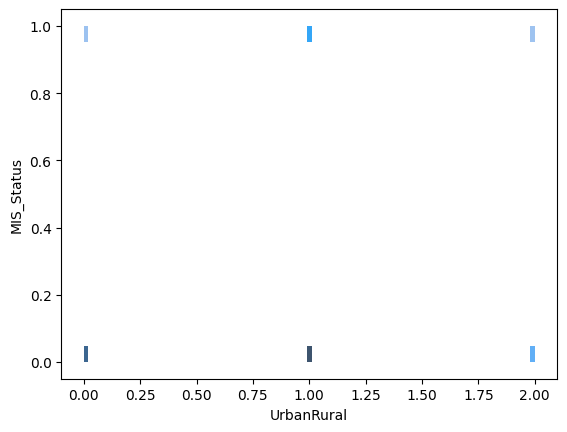

In [20]:
sns.histplot(x=df.UrbanRural,y = df.MIS_Status)

In [23]:
df = df[df["MIS_Status"]!=2]

In [26]:
total = df.MIS_Status.count()
(df.MIS_Status.sum()/total)

0.1753697686176077

In [27]:
# on  en déduit avoir 17% d'entreprise Rural

In [ ]:
# on veut maintenant savoir qui sont les plus susceptible entre les urbains et les rural de non payé 

In [28]:
df.corr()

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
NAICS,1.000000,-0.038335,0.046867,-0.039320,-0.036513,0.024561,0.436705,0.105743
NoEmp,-0.038335,1.000000,-0.040063,0.008624,0.015386,0.007416,-0.041847,-0.026315
NewExist,0.046867,-0.040063,1.000000,-0.001828,-0.008950,0.142301,0.031345,0.019373
CreateJob,-0.039320,0.008624,-0.001828,1.000000,0.994020,0.001232,-0.029880,0.011906
RetainedJob,-0.036513,0.015386,-0.008950,0.994020,1.000000,-0.000509,-0.024788,0.012339
FranchiseCode,0.024561,0.007416,0.142301,0.001232,-0.000509,1.000000,-0.009471,-0.015284
UrbanRural,0.436705,-0.041847,0.031345,-0.029880,-0.024788,-0.009471,1.000000,0.158076
MIS_Status,0.105743,-0.026315,0.019373,0.011906,0.012339,-0.015284,0.158076,1.000000


ON en deduit il y a une légère correlation avec le fait d'être rural 

In [31]:
df.MIS_Status.sum()/total

0.1753697686176077